# Part 1 Data Exploration

In [37]:
# 1.Data loading, observation(distribution, corelation, stripping)
# 2.Identify classification/regression problem, consider possible models
# 3.Feature Engineering, One-hot-encode (Linearty), drop (unrelated, univariance, low variance), split out ground truth
# 4.Model Selection, CV
# 5.Hyperparameter tuning, GridSearchCV
# 6.Model Evaluation, Confusion Matrix, ROC, AUC, MSE
# 7.Feature Selection, Coefficient, optimal number of features, RF feature importance
# Probablity option for classifiers

# loop through 3,4,5,6,7 for better model and better solution

## 1.1 Data loading 

In [38]:
#import packages and data

import warnings 
warnings.filterwarnings('ignore') #ignore warnings

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None) # unlimited numbers of columns to display

churn_df=pd.read_csv('LaiOfferData_downloads/data/churn.all')

In [39]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [40]:
# size of data

print 'Num of rows: '+str(churn_df.shape[0]) #row
print 'Num of columns: '+str(churn_df.shape[1]) #column

Num of rows: 5000
Num of columns: 21


## 1.2 Raw Data cleaning (strip)

In [41]:
#strip write space

churn_df['churned'][10]

' True.'

In [42]:
churn_df['churned']=churn_df['churned'].map(lambda x:x.strip())
churn_df['voice_mail_plan']=churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan']=churn_df['intl_plan'].map(lambda x:x.strip())

In [43]:
churn_df['churned'][10]

'True.'

## 1.3 Basic Data Stat

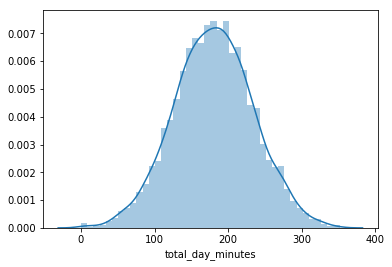

In [44]:
#raw data distribution, correlation

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_day_minutes'])

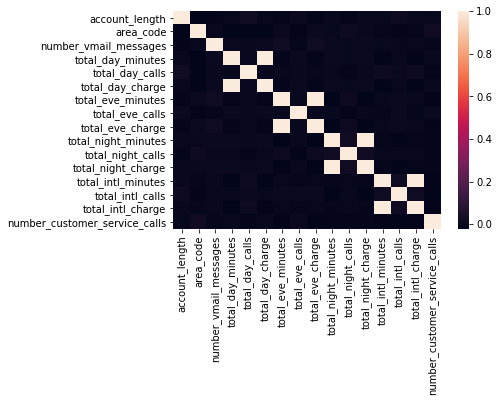

In [45]:
corr=churn_df[churn_df.columns].corr()

sb.heatmap(corr)

In [46]:
corr['total_intl_minutes']['total_intl_charge']

0.99999265702083207

In [47]:
corr

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.018054,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
area_code,-0.018054,1.000000,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004154,-0.013623,-0.004219,0.020921
number_vmail_messages,-0.014575,-0.003399,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,-0.019118,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,-0.019314,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,-0.019119,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.007098,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.012300,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.007114,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.002084,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533


# Part 2 Feature Processing

In [48]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [49]:
# Get ground truth

y=np.where(churn_df['churned']=='True.',1,0)

#Drop ground truth and other useless columns
to_drop=['state','area_code','phone_number','churned']
churn_dropped=churn_df.drop(to_drop,axis=1) #axis=1, apply to column

# yes or no converted to boolean values
yes_no=['intl_plan','voice_mail_plan']
churn_dropped['intl_plan']=churn_dropped['intl_plan'].map(lambda x: x=='yes')   #can only map one column at a time
churn_dropped['voice_mail_plan']=churn_dropped['voice_mail_plan'].map(lambda x: x=='yes')

#yes_no_cols = ["intl_plan","voice_mail_plan"]
#churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

churn_dropped.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [50]:
# Convert dataframe to Numpy-array 
x=churn_dropped.as_matrix().astype(np.float) # from panda dataframe to np array

x

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  61.  ,    0.  ,    0.  , ...,    4.  ,    3.67,    1.  ],
       [ 109.  ,    0.  ,    0.  , ...,    6.  ,    2.3 ,    0.  ],
       [  86.  ,    0.  ,    1.  , ...,   16.  ,    2.51,    0.  ]])

In [51]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # standardization: 0 mean, unit variance
x=scaler.fit_transform(x)

print 'Feature space holds %d observations and %d features' % x.shape
print 'Unique target lables: ',np.unique(y)

Feature space holds 5000 observations and 17 features
Unique target lables:  [0 1]


In [52]:
x

array([[ 0.69894149, -0.32324017,  1.66712012, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.16984882, -0.32324017,  1.66712012, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.92569549, -0.32324017, -0.5998368 , ...,  0.22991664,
         0.69597096, -1.20223603],
       ..., 
       [-0.98911606, -0.32324017, -0.5998368 , ..., -0.17715957,
         1.20573758, -0.43667564],
       [ 0.2202386 , -0.32324017, -0.5998368 , ...,  0.63699285,
        -0.63210525, -1.20223603],
       [-0.35924384, -0.32324017,  1.66712012, ...,  4.70775494,
        -0.35039211, -1.20223603]])

# Part 3 Model Training and Evaluation

## 3.1 KFold CV

In [53]:
#Cross Validation can only validate the model selection (not good at model evaluation: CM, ROC, AUC, MSE)

from sklearn.model_selection import KFold

def cv(x,y,n_splits,clf,**params):    ## ** keyworded paremeter with any length, exp: n_neighbors=5
    kf=KFold(n_splits=n_splits,shuffle=True)
    y_pred=y.copy()
    clf=clf(**params)                 ## certain clf model is an input 
    for train,test in kf.split(x,y):
        x_train,x_test=x[train],x[test]
        y_train=y[train]
        clf.fit(x_train,y_train)
        y_pred[test]=clf.predict(x_test)
    return y_pred

## 3.2 Train Model, predict results, calculate accuracy

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Can only calculate accuracy with CV , 
##classifier for biased prediction better have confusion matrix for evaluation
def accuracy(y_true,y_pred):       
    return np.mean(y_true==y_pred)

LR_CV_predict=cv(x,y,5,LogisticRegression)
RF_CV_predict=cv(x,y,5,RandomForestClassifier)
KNN_CV_predict=cv(x,y,5,KNeighborsClassifier) ##n_neighbors=5 as default
SVM_CV_predict=cv(x,y,5,LinearSVC)


In [55]:
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_predict))
print "Random Forest: " + str(accuracy(y, RF_CV_predict))
print "K-nearest-neighbors: " + str(accuracy(y, KNN_CV_predict))
print "SVM: " + str(accuracy(y, SVM_CV_predict))

Logistic Regression (L2 is default): 0.8656
Random Forest: 0.9502
K-nearest-neighbors: 0.8998
SVM: 0.8654


In [56]:
churn_df['LR_predicted_churn']=LR_CV_predict==1
churn_df['RF_predicted_churn']=RF_CV_predict==1
churn_df['KNN_predicted_churn']=KNN_CV_predict==1
churn_df['SVM_predicted_churn']=SVM_CV_predict==1
churn_df[['churned','LR_predicted_churn','RF_predicted_churn','KNN_predicted_churn','SVM_predicted_churn']].head()

,churned,LR_predicted_churn,RF_predicted_churn,KNN_predicted_churn,SVM_predicted_churn
0,False.,False,False,False,False
1,False.,False,False,False,False
2,False.,False,False,False,False
3,False.,True,True,False,False
4,False.,True,False,False,False


## 3.3 Hyperparameter selection with Grid Search

### 3.3.1 Logistic Regression

In [57]:
from sklearn.model_selection import GridSearchCV

parameters={'penalty':('l1','l2'),'C':(1,5,10)}
Grid_LR=GridSearchCV(LogisticRegression(),parameters,cv=5,verbose=1,refit=False)
Grid_LR.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=None, verbose=1)

In [58]:
Grid_LR.best_params_

{'C': 1, 'penalty': 'l1'}

In [59]:
def print_gs_metrics(gs):
    print 'Best score: %0.3f' % gs.best_score_ # keep 3 decimal 
    print 'Best parameters set :'
    best_parameters=gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print ('\t%s: %r'% (param_name,best_parameters[param_name]))

In [60]:
print_gs_metrics(Grid_LR)

Best score: 0.865
Best parameters set :
	C: 1
	penalty: 'l1'


### 3.3.2 KNN

In [61]:
parameters={'n_neighbors':(3,5,7,9)}
Grid_KNN=GridSearchCV(KNeighborsClassifier(),parameters,cv=5,verbose=1,refit=False)
Grid_KNN.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': (3, 5, 7, 9)}, pre_dispatch='2*n_jobs',
       refit=False, return_train_score=True, scoring=None, verbose=1)

In [62]:
print_gs_metrics(Grid_KNN)

Best score: 0.900
Best parameters set :
	n_neighbors: 5


## 3.4 Calculate Confusion Matrix for Classifier (precision, recall, accuracy)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

class_names=np.unique(y) ## an np array, need to convert to list
confusion_matrices=[
    ('Ramdom Forest',confusion_matrix(y,RF_CV_predict)),
    ('Logistic Regression',confusion_matrix(y,LR_CV_predict)),
    ('KNN',confusion_matrix(y,KNN_CV_predict)),
    ('SVM',confusion_matrix(y,SVM_CV_predict))
]

def clf_evaluation(clf,cm): ## confusion_matrix result from sklearn
    tp=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    tn=cm[1][1]
    accuracy=(tp+tn)/(tp+fp+fn+tn+0.0)
    precision=tp/(tp+fp+0.0)
    recall=tp/(tp+fn+0.0)
    print clf
    print 'Accuracy is: '+str(accuracy)
    print 'Precision is: '+str(precision)
    print 'Recall is: '+str(recall)
    

def draw_confusion_matrices(confusion_matrices,class_names):
    class_names=class_names.tolist()
    for model in confusion_matrices:
        clf,cm=model[0],model[1]
        clf_evaluation(clf,cm)
        fig=plt.figure()         
        ax=fig.add_subplot(111)   ## 
        cax=ax.matshow(cm,interpolation='nearest',cmap=plt.get_cmap('Reds')) ##
        plt.title('Confusion matrix for %s'% clf)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()


Ramdom Forest
Accuracy is: 0.9502
Precision is: 0.990915443746
Recall is: 0.952956989247


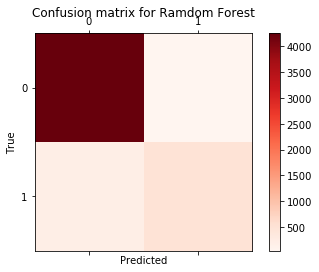

Logistic Regression
Accuracy is: 0.8656
Precision is: 0.975308641975
Recall is: 0.88091731538


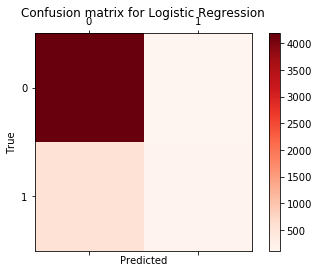

KNN
Accuracy is: 0.8998
Precision is: 0.985324947589
Recall is: 0.90616966581


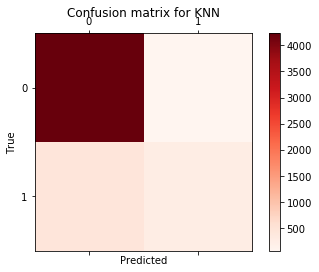

SVM
Accuracy is: 0.8654
Precision is: 0.98392732355
Recall is: 0.874896437448


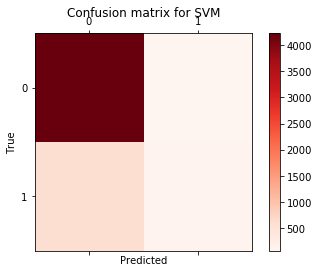

In [64]:
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

# Part 4 Feature Selection

## 4.1 LR model 

### 4.1.1 Compare feature coefficients (L1/L2)

In [65]:
LRmodel_l1=LogisticRegression(penalty='l1')
LRmodel_l1.fit(x,y)  ## no need to split train and test
LRmodel_l1.coef_[0]
print 'LR l1 coefficients'
##order by the absolute value of coefficients
for k,v in sorted(zip(map(lambda x: round(x,4),LRmodel_l1.coef_[0]),churn_dropped.columns),key=lambda(k,v):(-abs(k),v)):
    print v+': '+str(k)

LR l1 coefficients
voice_mail_plan: -0.8657
number_customer_service_calls: 0.673
intl_plan: 0.613
total_day_charge: 0.4724
number_vmail_messages: 0.396
total_eve_charge: 0.2912
total_day_minutes: 0.2621
total_intl_calls: -0.1743
total_intl_charge: 0.171
total_night_minutes: 0.1356
total_intl_minutes: 0.0723
total_eve_minutes: 0.0666
total_night_charge: 0.066
account_length: 0.0534
total_day_calls: 0.0495
total_night_calls: -0.0288
total_eve_calls: -0.0284


In [66]:
LRmodel_l2=LogisticRegression(penalty='l2')
LRmodel_l2.fit(x,y)  ## no need to split train and test
LRmodel_l2.coef_[0]
print 'LR l2 coefficients'
##order by the absolute value of coefficients
for k,v in sorted(zip(map(lambda x: round(x,4),LRmodel_l2.coef_[0]),churn_dropped.columns),key=lambda(k,v):(-abs(k),v)):
    print v+': '+str(k)

LR l2 coefficients
voice_mail_plan: -0.8929
number_customer_service_calls: 0.6731
intl_plan: 0.6132
number_vmail_messages: 0.4234
total_day_minutes: 0.3687
total_day_charge: 0.3664
total_eve_charge: 0.18
total_eve_minutes: 0.1794
total_intl_calls: -0.1761
total_intl_charge: 0.1235
total_intl_minutes: 0.1217
total_night_minutes: 0.1028
total_night_charge: 0.1008
account_length: 0.0552
total_day_calls: 0.0513
total_night_calls: -0.0307
total_eve_calls: -0.0304


### 4.1.2 RFE Recursive Feature Elimination (L1/L2) (feature importance priority)

Logistic Regression (L1) RFE Result
total_day_charge: 1.0
number_customer_service_calls: 2.0
intl_plan: 3.0
voice_mail_plan: 4.0
number_vmail_messages: 5.0
total_eve_minutes: 6.0
total_intl_charge: 7.0
total_night_minutes: 8.0
total_intl_calls: 9.0
total_eve_charge: 10.0
total_day_minutes: 11.0
account_length: 12.0
total_intl_minutes: 13.0
total_day_calls: 14.0
total_night_charge: 15.0
total_night_calls: 16.0
total_eve_calls: 17.0


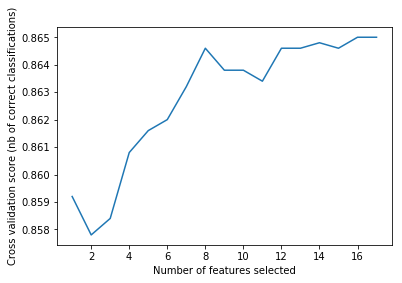

Optimal number of features:17


In [67]:
from sklearn.feature_selection import RFECV, RFE


rfe_l1=RFE(LRmodel_l1, n_features_to_select=1) 
rfe_l1.fit(x,y)
print 'Logistic Regression (L1) RFE Result'
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), churn_dropped.columns)):
    print v + ": " + str(k)
  


rfecv_l1=RFECV(estimator=LRmodel_l1,step=1,scoring='accuracy')
rfecv_l1.fit(x,y)

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv_l1.grid_scores_) + 1), rfecv_l1.grid_scores_)
plt.show()

print ('Optimal number of features:'+str(rfecv_l1.n_features_))


Logistic Regression (L2) RFE Result
total_day_minutes: 1.0
number_customer_service_calls: 2.0
intl_plan: 3.0
voice_mail_plan: 4.0
number_vmail_messages: 5.0
total_day_charge: 6.0
total_eve_charge: 7.0
total_intl_charge: 8.0
total_night_minutes: 9.0
total_eve_minutes: 10.0
total_intl_calls: 11.0
total_intl_minutes: 12.0
total_night_charge: 13.0
account_length: 14.0
total_day_calls: 15.0
total_night_calls: 16.0
total_eve_calls: 17.0


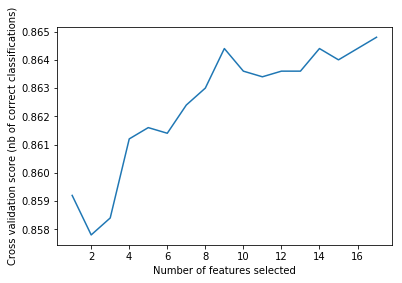

Optimal number of features:17


In [68]:

rfe_l2=RFE(LRmodel_l2, n_features_to_select=1) 
rfe_l2.fit(x,y)
print 'Logistic Regression (L2) RFE Result'
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), churn_dropped.columns)):
    print v + ": " + str(k)
  


rfecv_l2=RFECV(estimator=LRmodel_l2,step=1,scoring='accuracy')
rfecv_l2.fit(x,y)

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv_l2.grid_scores_) + 1), rfecv_l2.grid_scores_)
plt.show()

print ('Optimal number of features:'+str(rfecv_l2.n_features_))


## 4.2 Random Forest Model-Feature Importance

In [69]:
forest=RandomForestClassifier()
forest.fit(x,y)

importances=forest.feature_importances_

print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_dropped.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1529
total_day_charge: 0.1456
number_customer_service_calls: 0.1183
intl_plan: 0.0834
total_eve_minutes: 0.0709
total_eve_charge: 0.057
total_intl_calls: 0.0544
total_intl_charge: 0.0467
total_night_charge: 0.0457
total_night_minutes: 0.0399
account_length: 0.034
total_intl_minutes: 0.0306
total_night_calls: 0.0256
total_day_calls: 0.0254
number_vmail_messages: 0.0247
total_eve_calls: 0.0237
voice_mail_plan: 0.0214


# Part 5 Probabilities as Prediction Results

In [70]:
# RF, LR,KNN have probability, SVM doesn't

def prob_cv(x,y,clf,roc=False,**params):
    kf=KFold(n_splits=5,shuffle=True)
    y_prob=np.zeros((len(y),2)) # two classes 0/1
    for train,test in kf.split(x,y):
        x_train,x_test=x[train],x[test]
        y_train=y[train]
        clf_m=clf(**params)
        clf_m.fit(x_train,y_train)
        y_prob[test]=clf_m.predict_proba(x_test) # n sample, m classes, two classes in this case
    return y_prob   

In [71]:
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
true_prob=defaultdict(float)

pred_y_prob=prob_cv(x,y,RandomForestClassifier)
pred_y_churn=pred_y_prob[:,1] # 1st element of the inner list
is_churn=(y==1)

counts = pd.value_counts(pred_y_churn)
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_y_churn == prob])
true_prob = pd.Series(true_prob)

In [72]:
EvaResults = pd.concat([counts,true_prob], axis=1).reset_index()
EvaResults.columns = ['pred_prob', 'count', 'true_prob']
EvaResults

,pred_prob,count,true_prob
0,0.0,2740,0.026277
1,0.1,1068,0.022472
2,0.2,366,0.057377
3,0.3,132,0.128788
4,0.4,81,0.333333
5,0.5,69,0.579710
6,0.6,94,0.744681
7,0.7,84,0.928571
8,0.8,106,0.943396
9,0.9,130,0.984615
